In [1]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/2f/c7/ef29b1cfef781279ba46c6892440f08860822bf64798f34865529885b99b/ultralytics-8.0.237-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.9/691.9 kB 18.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

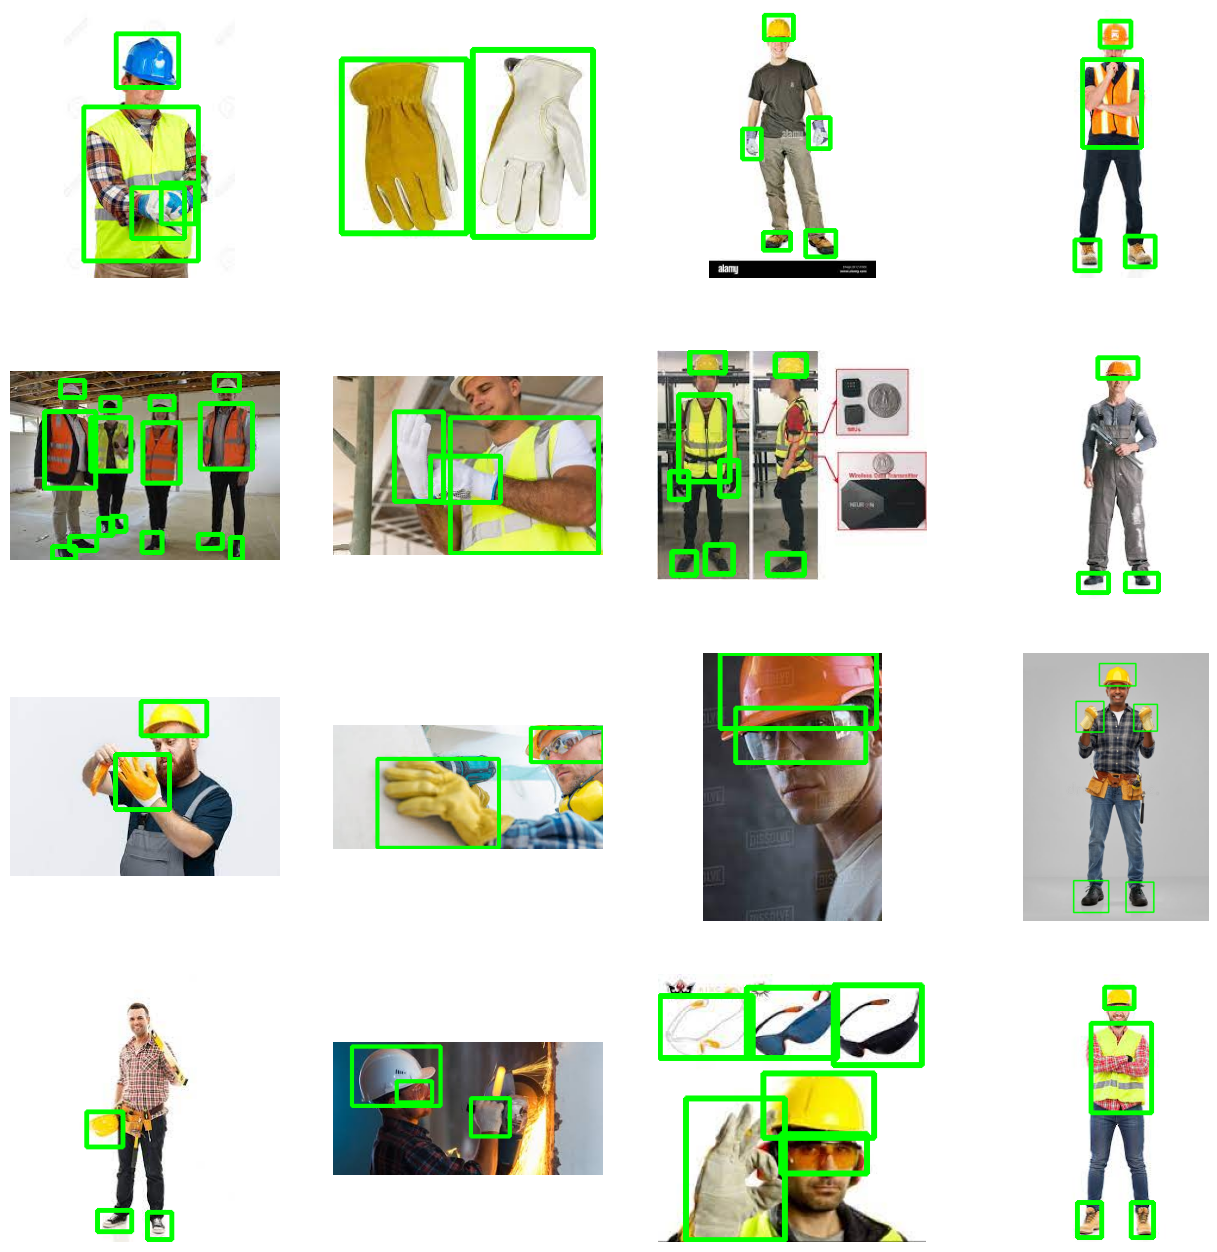

In [9]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/architectural-data/data/train/images"
train_labels = "/kaggle/input/architectural-data/data/train/labels"

test_images = "/kaggle/input/architectural-data/data/test/images"
test_labels = "/kaggle/input/architectural-data/data/test/labels"

val_images = "/kaggle/input/architectural-data/data/valid/images"
val_labels = "/kaggle/input/architectural-data/data/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

Image metadata


In [11]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/architectural-data/data/test/images/12.jpeg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 259x195 and 3 channels.


In [19]:
import yaml

# Define the content for the data.yaml file
data_content = {
    'train': '/kaggle/input/architectural-data/data/train',
    'val': '/kaggle/input/architectural-data/data/valid',
    'nc': 5,
    'names': ['Helmet', 'Goggles', 'Jacket', 'Gloves', 'Footwear']
}

# Path to save the data.yaml file
file_path = '/kaggle/input/architectural-data/data.yaml'

# Write the content to the data.yaml file
with open(file_path, 'w') as file:
    yaml.dump(data_content, file)


OSError: [Errno 30] Read-only file system: '/kaggle/input/architectural-data/data.yaml'

Model Training

In [12]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/input/architectural-data/data.yaml',
            epochs = 20,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.0.0+cpu CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/architectural-data/data.yaml, epochs=20, time=None, patience=50, batch=8, imgsz=195, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

RuntimeError: Dataset '/kaggle/input/architectural-data/data.yaml' error ❌ 
Dataset '/kaggle/input/architectural-data/data.yaml' images not found ⚠️, missing path '/content/drive/MyDrive/Classes/YOLOv8/data/valid'
Note dataset download directory is '/kaggle/working/datasets'. You can update this in '/root/.config/Ultralytics/settings.yaml'